In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('SouthAfrica_Merged.xlsx')

# Define BRICS and G7 countries (ISO codes)
brics = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']
g7 = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'USA']

# Filter data for BRICS and G7
df_filtered = df[df['partnerISO'].isin(brics + g7)].copy()

# Convert 'refYear' and 'refMonth' to datetime
df_filtered['date'] = pd.to_datetime(
    df_filtered['refYear'].astype(str) + '-' + df_filtered['refMonth'].astype(str),
    format='%Y-%m'
)

# Drop rows with missing 'qty' or 'primaryValue'
df_filtered = df_filtered.dropna(subset=['qty', 'primaryValue'])

In [ ]:
# Total gold imports by country (top 10)
imports_by_country = df_filtered.groupby('partnerDesc')['qty'].sum().sort_values(ascending=False).head(10)
print(imports_by_country)

# Yearly trends
yearly_trends = df_filtered.groupby('refYear')['qty'].sum()
print(yearly_trends)

partnerDesc
China           174.76
India            60.28
South Africa      0.04
Name: qty, dtype: float64
refYear
2018    162.78
2021     61.48
2022     10.82
Name: qty, dtype: float64


/tmp/ipython-input-7-336022730.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


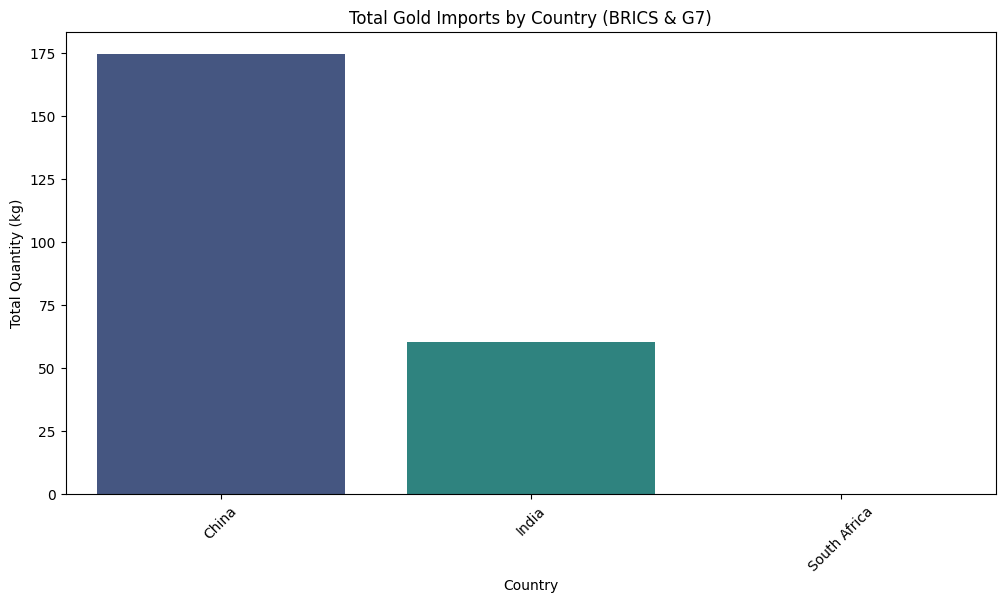

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    x=imports_by_country.index,
    y=imports_by_country.values,
    palette='viridis'
)
plt.title('Total Gold Imports by Country (BRICS & G7)')
plt.xlabel('Country')
plt.ylabel('Total Quantity (kg)')
plt.xticks(rotation=45)
plt.show()

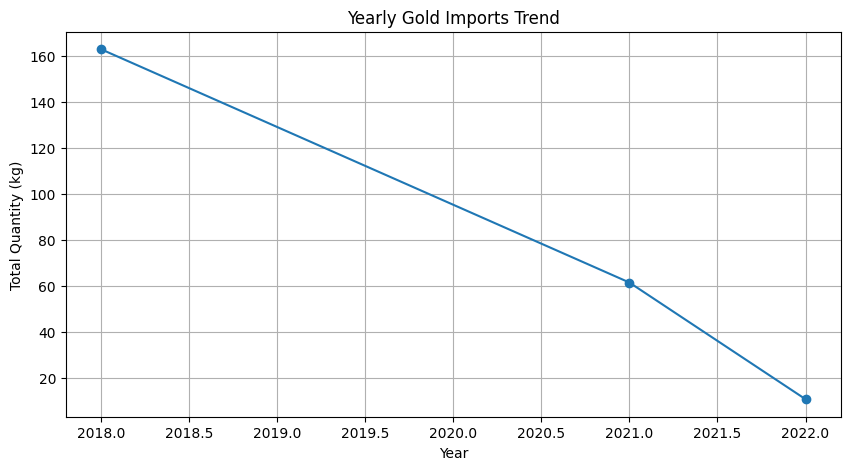

In [ ]:
plt.figure(figsize=(10, 5))
yearly_trends.plot(kind='line', marker='o')
plt.title('Yearly Gold Imports Trend')
plt.xlabel('Year')
plt.ylabel('Total Quantity (kg)')
plt.grid(True)
plt.show()

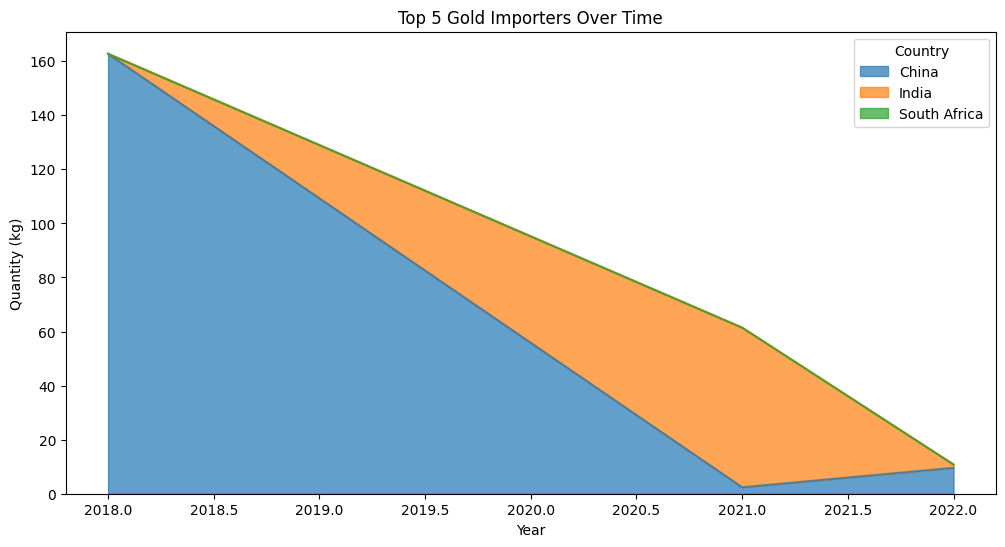

In [ ]:
top_countries = df_filtered.groupby(['refYear', 'partnerDesc'])['qty'].sum().unstack().fillna(0)
top_countries[top_countries.columns[:5]].plot(
    kind='area',
    stacked=True,
    figsize=(12, 6),
    alpha=0.7
)
plt.title('Top 5 Gold Importers Over Time')
plt.xlabel('Year')
plt.ylabel('Quantity (kg)')
plt.legend(title='Country')
plt.show()

In [ ]:
# Save filtered data
df_filtered.to_csv('filtered_gold_imports.csv', index=False)

# Save plots
plt.savefig('gold_imports_by_country.png')

<Figure size 640x480 with 0 Axes>